In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Unzip the MNIST file

In [ ]:
!unzip "/content/drive/My Drive/Data/MNIST.zip"

Streaming output truncated to the last 5000 lines.
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5503.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5504.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5505.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5506.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5507.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5508.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5509.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/551.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5510.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5511.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5512.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5513.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5514.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5515.png  
 extracting: MNIST/Digits/Train_UQcUa52/Images/train/5

In [ ]:
#Import required libraries

In [ ]:
import os
import numpy as np
from matplotlib import pyplot
from PIL import Image
import random as python_random
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam

In [ ]:
# get the image, get the array of that image then plot the image

PNG
RGBA
(28, 28)


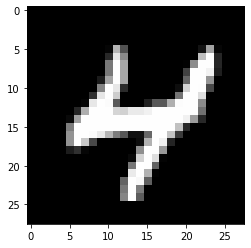

In [ ]:
path = '/content/MNIST/Digits/Train_UQcUa52/Images/test/49000.png'
image = Image.open(path)
print(image.format)
print(image.mode)
print(image.size)
data = np.asarray(image)
pyplot.imshow(data)
pyplot.show()

In [ ]:
#get the array of the image in a different way

(28, 28, 4)


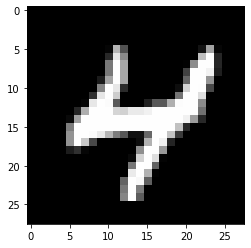

In [ ]:
from matplotlib import image
from matplotlib import pyplot
 
data = image.imread(path)
#print(data.type)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

In [ ]:
# get the image array using keras

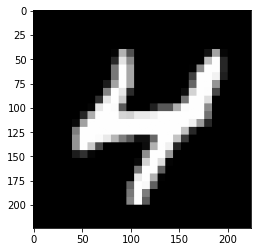

In [ ]:
img = tf.keras.preprocessing.image.load_img(path,target_size = (224,224))
ary = tf.keras.preprocessing.image.img_to_array(img)
ary = np.array(ary)/255
pyplot.imshow(ary)
pyplot.show()

In [ ]:
# path of train directory

In [ ]:
images = '/content/MNIST/Digits/Train_UQcUa52/Images/train'
image_name = os.listdir(images)

In [ ]:
str(1)

'1'

In [ ]:
# Converet all the images into Tensor, Make sure that all the images stack properly othewise image and that label may miss-match, # thats whay i used k variable

In [ ]:
x_train = []
for i in range(49000):
    k = str(i)+'.png'  
    path = images + '/' + k
    img = tf.keras.preprocessing.image.load_img(path,target_size = (28,28),color_mode='grayscale')
    ary = tf.keras.preprocessing.image.img_to_array(img)
    ary = np.array(ary)/255
    x_train.append(ary)

In [ ]:
# print the images to cross check with its labels. Here i cant plot image because of the image is in grayscale

In [ ]:
x_train = np.array(x_train, dtype ='float32')
pyplot.imshow(x_train[48999],cmap='gray')
pyplot.show()

In [ ]:
x_train.shape # shape of train data here 49000 is the number of training examples

(49000, 28, 28, 1)

In [ ]:
# Follow the same procedure with test data

In [ ]:
images = '/content/MNIST/Digits/Train_UQcUa52/Images/test'
image_name = os.listdir(images)

In [ ]:
x_test = []
test_name = []
for i in range(49000, 70000):
    k = str(i)+'.png'
    test_name.append(k)
    path = images + '/' + k
    img = tf.keras.preprocessing.image.load_img(path,target_size = (28,28),color_mode='grayscale')
    ary = tf.keras.preprocessing.image.img_to_array(img)
    ary = np.array(ary)/255
    x_test.append(ary)

In [ ]:
x_test = np.array(x_test, dtype = 'float32')
pyplot.imshow(x_test[5])
pyplot.show()

In [ ]:
x_test.shape

(21000, 28, 28, 1)

In [ ]:
# label of train data

In [ ]:
y_train = pd.read_csv('/content/MNIST/Digits/Train_UQcUa52/train.csv')
y_train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
y_train = y_train['label']
print(y_train.shape)

(49000,)


In [ ]:
# one_hot encoding of labels

In [ ]:
def convert_to_one_hot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y
y_train = np.array(y_train)
y_train = convert_to_one_hot(y_train,10)
print(y_train.shape)

(49000, 10)


In [ ]:
#get the train test from the original train data 

In [ ]:
X_train = x_train[:40000,:,:,:]
print(X_train.shape)
 
X_test = x_train[40000:,:,:,:]
print(X_test.shape)
 
Y_train = y_train[:40000,:]
print(Y_train.shape)
 
Y_test = y_train[40000:,:]
print(Y_test.shape)

(40000, 28, 28, 1)
(9000, 28, 28, 1)
(40000, 10)
(9000, 10)


Experiment-1: Inception V3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
np.random.seed(123)
tf.random.set_seed(123)
IMAGE_SIZE = [28,28]
 
vgg = InceptionV3(input_shape = (75,75,3), weights = None, include_top = False)

vgg.load_weights(local_weights_file)
 
for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
x = Dense(128,activation = 'relu')(x)
prediction = Dense(10, activation='softmax')(x)
 
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
 
# view the structure of the model
model.summary()
opt = Adam(learning_rate=0.0001, decay=0.001)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

--2020-08-10 13:35:31--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.129.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.129.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   208MB/s    in 0.4s    

2020-08-10 13:35:32 (208 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 75, 75, 3)]  0                 

In [ ]:
model.fit(x_train,y_train,epochs = 30,batch_size = 64, verbose=1,validation_split=0.2)

In [ ]:
model.evaluate(X_test,Y_test)

154/154 [==============================] - 8s 54ms/step - loss: 0.2799 - accuracy: 0.9154


[0.2799443006515503, 0.9154081344604492]

Experiment 2 - VGG19

In [ ]:

np.random.seed(123)
tf.random.set_seed(123)
IMAGE_SIZE = [32,32]
 
vgg = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)
 
for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
#x = Dense(500,activation = 'relu')(x)
prediction = Dense(10, activation='softmax')(x)
 
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
 
# view the structure of the model
model.summary()
opt = Adam(learning_rate=0.0001, decay=0.001)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

--2020-08-10 13:34:45--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 74.125.201.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  60.0MB/s    in 1.4s    

2020-08-10 13:34:46 (60.0 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
blo

CNN

CNN Experiment - 3

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets
 
for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model[j].summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_433 (Conv2D)          (None, 28, 28, 24)        624       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 14, 14, 24)        0         
_________________________________________________________________
flatten_59 (Flatten)         (None, 4704)              0         
_________________________________________________________________
dense_117 (Dense)            (None, 256)               1204480   
_________________________________________________________________
dense_118 (Dense)            (None, 10)                2570      
Total params: 1,207,674
Trainable params: 1,207,674
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_55"
_________________________________________________________________
Layer (type)        

In [ ]:
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 50
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train, batch_size=80, epochs = epochs, 
        validation_split = 0.2,  verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/50
490/490 [==============================] - 4s 7ms/step - loss: 0.2036 - accuracy: 0.9418 - val_loss: 0.0784 - val_accuracy: 0.9749
Epoch 2/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0633 - val_accuracy: 0.9802
Epoch 3/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.0553 - val_accuracy: 0.9832
Epoch 4/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0631 - val_accuracy: 0.9815
Epoch 5/50
490/490 [==============================] - 3s 7ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0635 - val_accuracy: 0.9830
Epoch 6/50
490/490 [==============================] - 4s 7ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0521 - val_accuracy: 0.9863
Epoch 7/50
490/490 [==============================] - 4s 7ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0596 - val_accuracy: 0.9847
Epoch 

In [ ]:
model[0].evaluate(x_train,y_train)

1532/1532 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9976


[0.018937472254037857, 0.9976326823234558]

In [ ]:
model[1].evaluate(x_train,y_train)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.0147 - accuracy: 0.9985


[0.01469632051885128, 0.9984897971153259]

In [ ]:
model[2].evaluate(x_train,y_train)

1532/1532 [==============================] - 7s 4ms/step - loss: 0.0172 - accuracy: 0.9980


[0.01717444509267807, 0.9979795813560486]

CNN Experiment - 4

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model[j].summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_439 (Conv2D)          (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_440 (Conv2D)          (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_124 (Dense)            (None, 10)              

In [ ]:
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 40
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train, batch_size=80, epochs = epochs, 
        validation_split = 0.2,  verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/40
490/490 [==============================] - 3s 6ms/step - loss: 0.3259 - accuracy: 0.9053 - val_loss: 0.1380 - val_accuracy: 0.9601
Epoch 2/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0899 - accuracy: 0.9722 - val_loss: 0.0977 - val_accuracy: 0.9702
Epoch 3/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.0618 - val_accuracy: 0.9819
Epoch 4/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0493 - accuracy: 0.9833 - val_loss: 0.0659 - val_accuracy: 0.9805
Epoch 5/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.0577 - val_accuracy: 0.9836
Epoch 6/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0494 - val_accuracy: 0.9853
Epoch 7/40
490/490 [==============================] - 3s 6ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0579 - val_accuracy: 0.9845
Epoch 

In [ ]:
model[0].evaluate(x_train,y_train)

1532/1532 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9980


[0.013204426504671574, 0.9980000257492065]

In [ ]:
model[1].evaluate(x_train,y_train)

1532/1532 [==============================] - 5s 3ms/step - loss: 0.0130 - accuracy: 0.9985


[0.012970139272511005, 0.9985306262969971]

In [ ]:
model[4].evaluate(x_train,y_train)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.0124 - accuracy: 0.9985


[0.01236500684171915, 0.9984694123268127]

In [ ]:
model[5].evaluate(x_train,y_train)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.0126 - accuracy: 0.9984


[0.012645325623452663, 0.9984285831451416]

In [ ]:
model[2].evaluate(x_train,y_train)

1532/1532 [==============================] - 5s 4ms/step - loss: 0.0128 - accuracy: 0.9980


[0.012809092178940773, 0.9980407953262329]

In [ ]:
model[3].evaluate(x_train,y_train)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.0215 - accuracy: 0.9965


[0.021486181765794754, 0.9964898228645325]

CNN Experiment - 5

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)
nets = 8
model = [0] *nets
 
for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model[j].summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1024)            

In [ ]:
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 60
for j in range(6,7):
    history[j] = model[j].fit(x_train,y_train, batch_size=80, epochs = epochs, 
        validation_split = 0.2,  verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

In [ ]:
model[0].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9917


[0.10093334317207336, 0.9916666746139526]

In [ ]:
model[1].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.1108 - accuracy: 0.9914


[0.11081279069185257, 0.99144446849823]

In [ ]:
model[2].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.0760 - accuracy: 0.9921


[0.07600332051515579, 0.992111086845398]

In [ ]:
model[3].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.0529 - accuracy: 0.9933


[0.05292125418782234, 0.9933333396911621]

In [ ]:
model[4].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9936


[0.036992233246564865, 0.9935555458068848]

In [ ]:
model[6].evaluate(X_test,Y_test)

282/282 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9941


[0.023533759638667107, 0.9941111207008362]

CNN Experiment - 6 (Advanced and selected architecture)

In [ ]:
j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))


model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.005, decay=0.0001)
model[j].compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_66 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_67 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_68 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_52 (Dropout)         (None, 12, 12, 32)      

In [ ]:
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 60
for j in range(4,5): # reange 4 to 5 because of i want model 4 to be trained 
    history[j] = model[j].fit(x_train,y_train, batch_size=64, epochs = epochs,
        validation_split = 0.2, verbose=1)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))

Epoch 1/60
613/613 [==============================] - 10s 16ms/step - loss: 4.9254e-04 - accuracy: 0.9998 - val_loss: 0.0495 - val_accuracy: 0.9941
Epoch 2/60
613/613 [==============================] - 10s 16ms/step - loss: 4.4908e-04 - accuracy: 0.9998 - val_loss: 0.0527 - val_accuracy: 0.9945
Epoch 3/60
613/613 [==============================] - 10s 16ms/step - loss: 6.3816e-04 - accuracy: 0.9998 - val_loss: 0.0534 - val_accuracy: 0.9945
Epoch 4/60
613/613 [==============================] - 10s 16ms/step - loss: 2.0183e-04 - accuracy: 0.9999 - val_loss: 0.0502 - val_accuracy: 0.9946
Epoch 5/60
613/613 [==============================] - 9s 15ms/step - loss: 2.6621e-04 - accuracy: 0.9999 - val_loss: 0.0494 - val_accuracy: 0.9946
Epoch 6/60
613/613 [==============================] - 9s 15ms/step - loss: 1.7719e-04 - accuracy: 0.9999 - val_loss: 0.0488 - val_accuracy: 0.9945
Epoch 7/60
613/613 [==============================] - 9s 15ms/step - loss: 3.3741e-04 - accuracy: 0.9999 - val_los

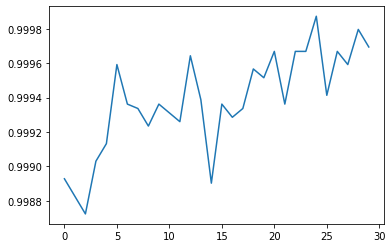

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history[4].history['accuracy'])

In [ ]:
model[4].evaluate(x_train,y_train)

1532/1532 [==============================] - 12s 8ms/step - loss: 0.0122 - accuracy: 0.9984


[0.0121898939833045, 0.9984081387519836]

In [ ]:
model[1].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9984


[0.033072423189878464, 0.9984081387519836]

In [ ]:
model[2].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9984


[0.022045202553272247, 0.9984489679336548]

In [ ]:
model[3].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0290 - accuracy: 0.9983


[0.029029622673988342, 0.9982653260231018]

In [ ]:
model[4].evaluate(x_train,y_train)

1532/1532 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9981


[0.01072776410728693, 0.9981428384780884]

CNN Experiment - 7

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    model[j].summary()

Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_246 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_115 (Flatten)        (None, 1024)              0         
_________________________________________________________________
dense_222 (Dense)            (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
________________________________________________

In [ ]:
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 40
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train, batch_size=80, epochs = epochs, 
        validation_split = 0.2, verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=40, Train accuracy=1.00000, Validation accuracy=0.99112
CNN 32N: Epochs=40, Train accuracy=0.99967, Validation accuracy=0.99245
CNN 64N: Epochs=40, Train accuracy=1.00000, Validation accuracy=0.99214
CNN 128N: Epochs=40, Train accuracy=1.00000, Validation accuracy=0.99204
CNN 256N: Epochs=40, Train accuracy=0.99982, Validation accuracy=0.99214
CNN 512N: Epochs=40, Train accuracy=1.00000, Validation accuracy=0.99255
CNN 1024N: Epochs=40, Train accuracy=0.99992, Validation accuracy=0.99214
CNN 2048N: Epochs=40, Train accuracy=1.00000, Validation accuracy=0.99286


In [ ]:
model[0].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9982


[0.012211025692522526, 0.9982244968414307]

In [ ]:
model[1].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0116 - accuracy: 0.9982


[0.011631677858531475, 0.9982244968414307]

In [ ]:
model[2].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0141 - accuracy: 0.9978


[0.014136807061731815, 0.9977959394454956]

In [ ]:
model[3].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0134 - accuracy: 0.9983


[0.013376004993915558, 0.9982653260231018]

In [ ]:
model[4].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0147 - accuracy: 0.9978


[0.014669683761894703, 0.9978163242340088]

In [ ]:
model[5].evaluate(x_train,y_train)

1532/1532 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 0.9984


[0.006436468102037907, 0.9984489679336548]

In [ ]:
model[6].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9973


[0.01607355661690235, 0.9973061084747314]

In [ ]:
model[7].evaluate(x_train,y_train)

1532/1532 [==============================] - 3s 2ms/step - loss: 0.0136 - accuracy: 0.9986


[0.013551750220358372, 0.9985714554786682]

In [ ]:
y_test_pred = model[4].predict(x_test)

In [ ]:
y_pred = []
for i in range(21000):
  y_pred.append(np.argmax(y_test_pred[i]))

In [ ]:
y_pred = np.array(y_pred)
y_pred.shape

(21000,)

In [ ]:
y_pred[100]

9

In [ ]:
ans = pd.DataFrame()
ans['filename'] = test_name
ans['label'] = y_pred
ans.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
ans.tail()

,filename,label
20995,69995.png,9
20996,69996.png,2
20997,69997.png,6
20998,69998.png,6
20999,69999.png,2


In [ ]:
ans.to_csv('/content/drive/My Drive/Data/MNIST/prediction38.csv')